# Define the pdfs

We need to ensure that the pdfs are properly truncated

In [106]:
import scipy
from scipy.stats import crystalball, truncexpon, uniform, truncnorm
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from scipy.optimize import brute, minimize

In [77]:
#define the parameters
mu = 3
sigma = 0.3
beta = 1
m = 1.4
f = 0.6
lmbda = 0.3
mu_b = 0
sigma_b = 2.5

#define upper and lower limits
X_ulim = 5
X_llim = 0
Y_ulim = 10
Y_llim = 0

def g_s(X):
    return crystalball.pdf(X, beta, m, mu, sigma) / (crystalball.cdf(X_ulim, beta, m, mu, sigma) - crystalball.cdf(X_llim, beta, m, mu, sigma))

def h_s(Y):
    trunc_b = (Y_ulim - Y_llim)*lmbda
    return truncexpon.pdf(Y, trunc_b, Y_llim, 1/lmbda)

def g_b(X):
    return uniform.pdf(X, X_llim, X_ulim)

def h_b(Y):
    a = (mu_b - Y_llim)/sigma_b
    b = (Y_ulim - mu_b)/sigma_b
    return truncnorm.pdf(Y, a, b, mu_b, sigma_b)

Plot these pdfs to visualise what they look like

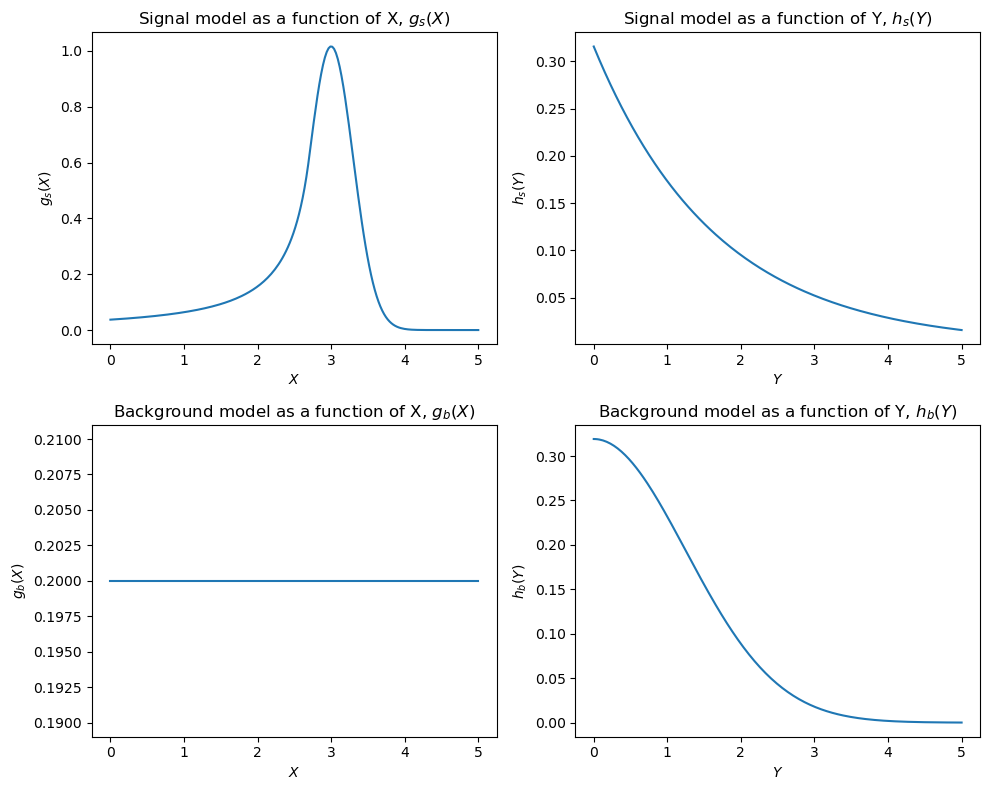

In [78]:
# Create a 2x2 grid of plots
fig, ax = plt.subplots(2, 2, figsize=(10, 8)) 

x = np.linspace(0, 5, 200)
y = np.linspace(0, 10, 200)

#plot the signal for X
ax[0,0].plot(x, g_s(x))
ax[0,0].set_title(r'Signal model as a function of X, $g_s(X)$')
ax[0,0].set_ylabel(r'$g_s(X)$')
ax[0,0].set_xlabel(r'$X$')

#plot the signal for Y
ax[0,1].plot(x, h_s(y))
ax[0,1].set_title(r'Signal model as a function of Y, $h_s(Y)$')
ax[0,1].set_ylabel(r'$h_s(Y)$')
ax[0,1].set_xlabel(r'$Y$')

#plot the background for X
ax[1,0].plot(x, g_b(x))
ax[1,0].set_title(r'Background model as a function of X, $g_b(X)$')
ax[1,0].set_ylabel(r'$g_b(X)$')
ax[1,0].set_xlabel(r'$X$')

#plot the background for Y
ax[1,1].plot(x, h_b(y))
ax[1,1].set_title(r'Background model as a function of Y, $h_b(Y)$')
ax[1,1].set_ylabel(r'$h_b(Y)$')
ax[1,1].set_xlabel(r'$Y$')

plt.tight_layout()


Numeric integration to show that they are normalised

In [50]:
#can change the parameters to ensure correct normalisation always
mu = 4
sigma = 9
beta = 12
m = 12
f = 0.8
lmbda = 9
mu_b = 2
sigma_b = 3


integral_g_s = scipy.integrate.quad(g_s, X_llim, X_ulim)
integral_h_s = scipy.integrate.quad(h_s, Y_llim, Y_ulim)
integral_g_b = scipy.integrate.quad(g_b, X_llim, X_ulim)
integral_h_b = scipy.integrate.quad(h_b, Y_llim, Y_ulim)

print(f'Integral of g_s is {integral_g_s[0]: 0.1f}, with error {integral_g_s[1]}.')
print(f'Integral of h_s is {integral_h_s[0]: 0.1f}, with error {integral_h_s[1]}.')
print(f'Integral of g_b is {integral_g_b[0]: 0.1f}, with error {integral_g_b[1]}.')
print(f'Integral of h_b is {integral_h_b[0]: 0.1f}, with error {integral_h_b[1]}.')

Integral of g_s is  1.0, with error 1.110223024625157e-14.
Integral of h_s is  1.0, with error 4.98081735191946e-13.
Integral of g_b is  1.0, with error 1.1102230246251569e-14.
Integral of h_b is  1.0, with error 4.109627083082046e-10.


Plot the probability distribution $P_X = g_b(X)+g_s(X)$ and $P_Y = h_b(Y)+h_s(Y)$ and make sure they are normalised.

In [51]:
#define original parameters again
mu = 3
sigma = 0.3
beta = 1
m = 1.4
f = 0.6
lmbda = 0.3
mu_b = 0
sigma_b = 2.5

In [82]:
def P_X(x):
    return (1-f) * g_b(x) + f * g_s(x)

def P_Y(y):
    return (1-f) * h_b(y) + f * h_s(y)

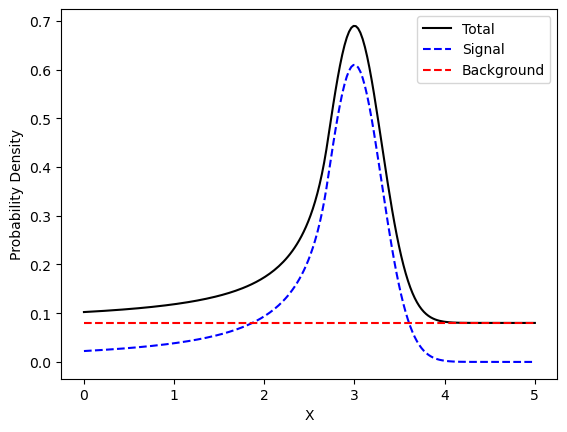

In [80]:
plt.plot(x, P_X(x), 'k-', label='Total')
plt.plot(x, f*g_s(x), 'b--', label='Signal')
plt.plot(x, (1-f)*g_b(x), 'r--', label='Background')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

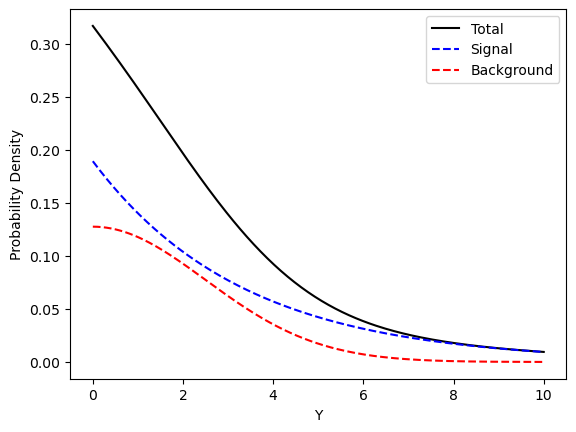

In [84]:
plt.plot(y, P_Y(y), 'k-', label='Total')
plt.plot(y, f*h_s(y), 'b--', label='Signal')
plt.plot(y, (1-f)*h_b(y), 'r--', label='Background')
plt.xlabel('Y')
plt.ylabel('Probability Density')
plt.legend()

Plot joint pdf $F(X,Y) = f g_s(X)h_s(Y) + (1-f) g_b(X)h_s(Y)$

Text(0.5, 1.0, 'Joint PDF')

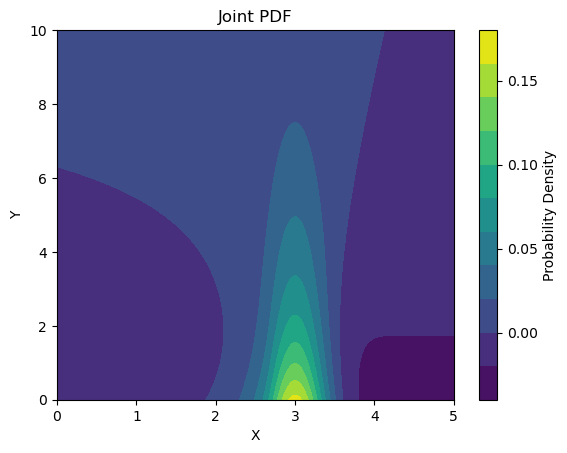

In [119]:
X, Y = np.meshgrid(x,y)

def signal_joint (X, Y):
    return f * g_s(X) * h_s (Y)

def background_joint (X, Y):
    return (f-1) * g_b (X) * h_b(Y)

def joint_pdf (X, Y):
    return signal_joint (X, Y) + background_joint(X, Y)

contour = plt.contourf(X, Y, joint_pdf(X, Y), levels = 10, cmap = 'viridis')
cbar = plt.colorbar(contour)
cbar.set_label("Probability Density")
cbar.set_ticks([0, 0.05, 0.1, 0.15])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Joint PDF')

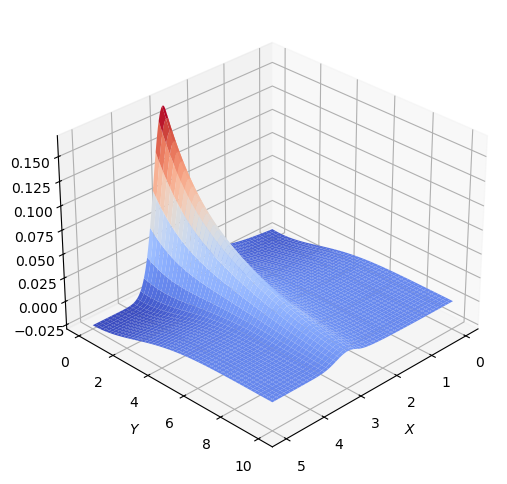

In [104]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
_ = ax.plot_surface(X, Y, joint_pdf(X, Y), cmap='coolwarm' )
ax.view_init(elev=30, azim=45)

Make an accept-reject simulator for 2d to sample from the joint distribution

In [121]:
#modify the above function to be able to handle 2d
def find_fmax_2d(func, x_range = (X_llim, X_ulim), y_range = (Y_llim, Y_ulim)):
    f_to_min = lambda vars: -func(vars[0], vars[1])
    initial_guess = [0,1]
    result = minimize(f_to_min, x0 = initial_guess, bounds = [x_range, y_range])
    max_x, max_y = result.x
    max_f = func(max_x, max_y)
    return max_f

find_fmax_2d (joint_pdf)

np.float64(0.1669793986946343)

In [133]:
def accept_reject_2d(func, x_range = (X_llim, X_ulim), y_range = (Y_llim, Y_ulim), num_samples = 50, seed = 42):
    np.random.seed(seed)
    fmax = find_fmax_2d (func, x_range, y_range)
    count = 0
    while count < num_samples:
        x_temp = np.random.uniform(x_range[0], x_range[1])
        y_temp = np.random.uniform(y_range[0], y_range[1])
        f_temp = np.random.uniform(0, fmax)
        if f_temp < func(x_temp, y_temp):
            count += 1
            yield x_temp, y_temp

In [137]:
accepted = accept_reject_2d(joint_pdf)

In [138]:
list(accepted)

[(2.993292420985183, 1.5601864044243652),
 (2.571172192068058, 5.924145688620425),
 (3.0377242595071916, 1.7052412368729153),
 (3.1164906341377896, 3.308980248526492),
 (2.6136641469099704, 4.275410183585496),
 (3.1676485538044736, 5.357746840747585),
 (3.0321452982979498, 0.09197051616629648),
 (3.317508845540279, 0.05061583846218687),
 (2.8503058504468246, 0.9717649377076854),
 (3.058603731171761, 4.196000624277899),
 (3.0792504902610824, 6.350936508676438),
 (3.0910903165813055, 1.0112267612279024),
 (3.2043737240160732, 1.8188008439914483),
 (2.52944339442233, 6.1145423543464785),
 (2.9563771787246464, 3.9900270387013026),
 (1.6759862082295047, 8.028534485980114),
 (2.976925086600219, 0.6707647738842748),
 (2.9511533343454355, 3.6097389694002677),
 (2.839726152763147, 9.154882975880419),
 (2.7542868530456968, 0.8698675991141014),
 (3.131101608157077, 1.3124487768238757),
 (2.276100745409006, 0.11620539908100636),
 (3.5123248527205195, 5.5964868348691414),
 (2.722445489804248, 0.057